# Load data and simple visualizing

In [397]:
import pandas as pd

In [398]:
col = ['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)']

In [399]:
df = pd.read_csv('XAUUSD.csv')

In [400]:
df = df.set_axis(col, axis=1)[1:]

In [401]:
df.describe()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
count,622,622,622,622,622,622,622
unique,622,613,616,610,617,577,264
top,7/4/2023 0:00,1825.69,1812.03,1699.2,1746.74,123,-0.1
freq,1,2,2,2,2,3,9


In [402]:
df.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
1,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
2,7/3/2023 0:00,1917.7,1930.5,1910.11,1921.17,347,0.18
3,7/2/2023 0:00,1920.3,1920.3,1917.5,1917.7,-260,-0.14
4,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.2,1049,0.55
5,6/29/2023 0:00,1909.47,1913,1893.16,1908.76,-71,-0.04


In [403]:
import pandas as pd

def check_nan(data):
    
    nan_counts = data.isnull().sum().to_dict()
    return nan_counts

nan_counts = check_nan(df)

for column, count in nan_counts.items():
    print(f"Column '{column}': {count} NaN values")

Column 'Date': 0 NaN values
Column 'Open': 0 NaN values
Column 'High': 0 NaN values
Column 'Low': 0 NaN values
Column 'Close': 0 NaN values
Column 'Change(Pips)': 0 NaN values
Column 'Change(%)': 0 NaN values


# Model

In [404]:
data = df[['Close']].copy()
data = data.astype(float)
data
train = data.Close[:int(len(data) * 0.9)]
test = data.Close[int(len(data)* 0.9):]

In [405]:
len(test)

63

In [406]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print(f"p-value: {result[1]}")

p-value: 0.33432174665314895


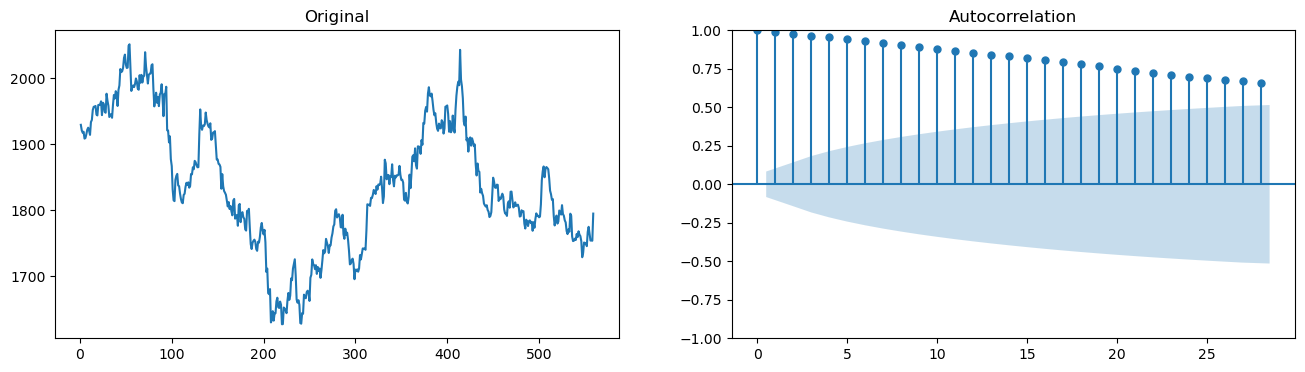

In [407]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(train)
ax1.set_title("Original")
plot_acf(train, ax = ax2);

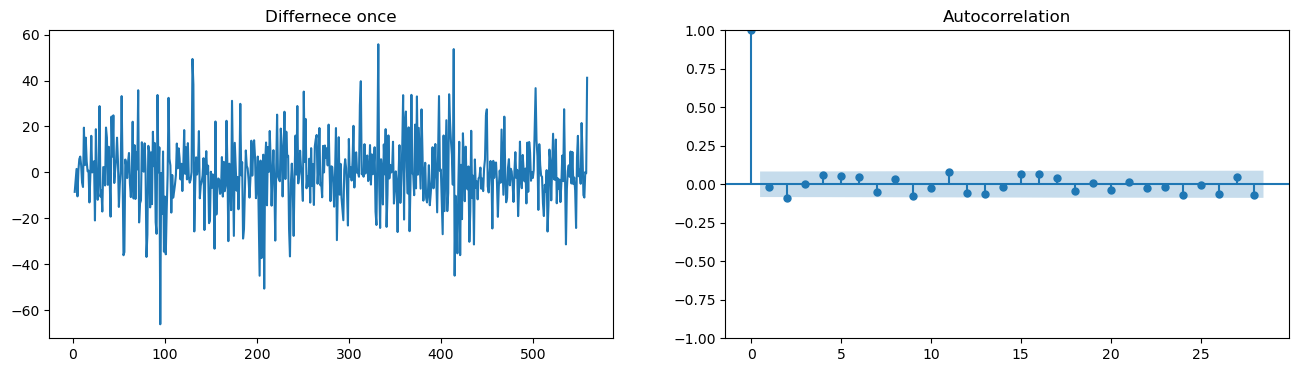

In [408]:
diff = train.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Differnece once")
plot_acf(diff, ax = ax2);

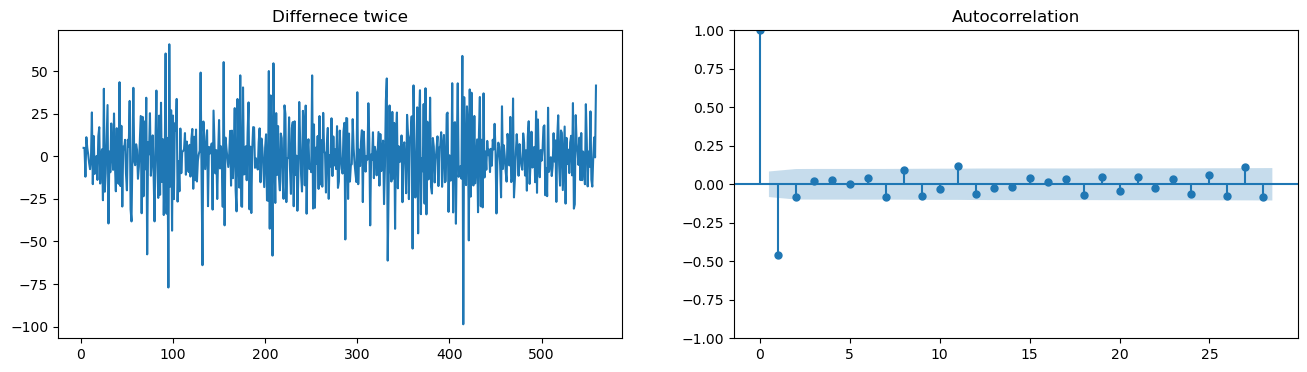

In [409]:
diff = train.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Differnece twice")
plot_acf(diff, ax = ax2);

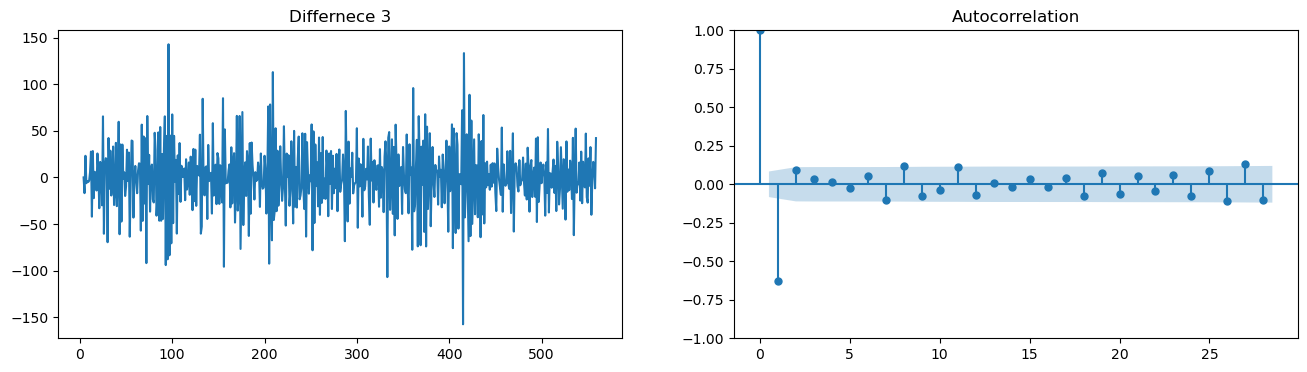

In [410]:
diff = train.diff().diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Differnece 3")
plot_acf(diff, ax = ax2);

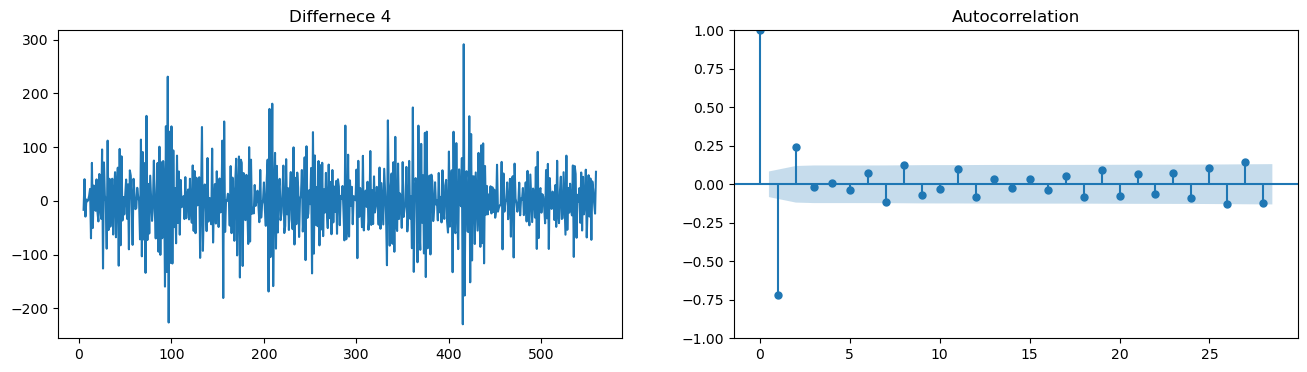

In [411]:
diff = train.diff().diff().diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Differnece 4")
plot_acf(diff, ax = ax2);

In [412]:
from pmdarima.arima.utils import ndiffs
ndiffs(train, test="adf")

1

p

C:\Users\11\anaconda3\envs\Pytorch\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


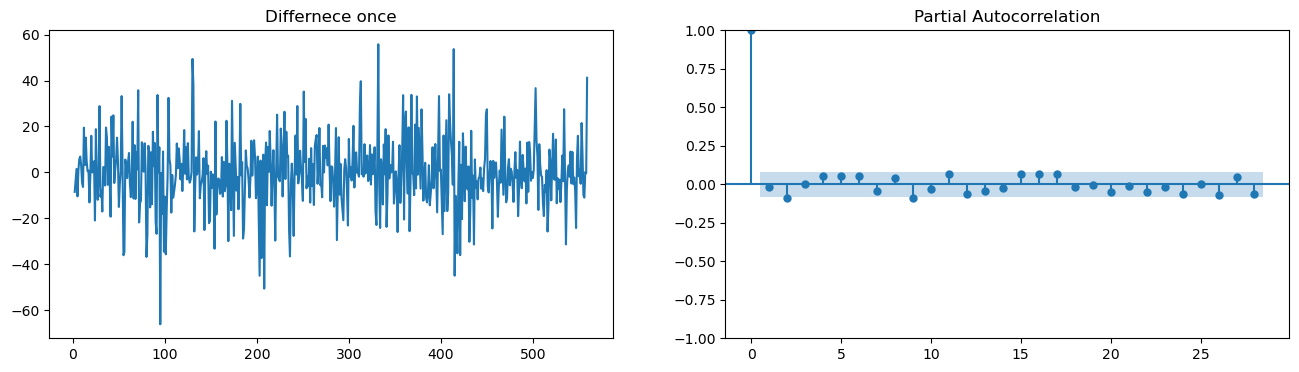

In [413]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = train.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Differnece once")
plot_pacf(diff, ax = ax2);

In [414]:
p = 9

q

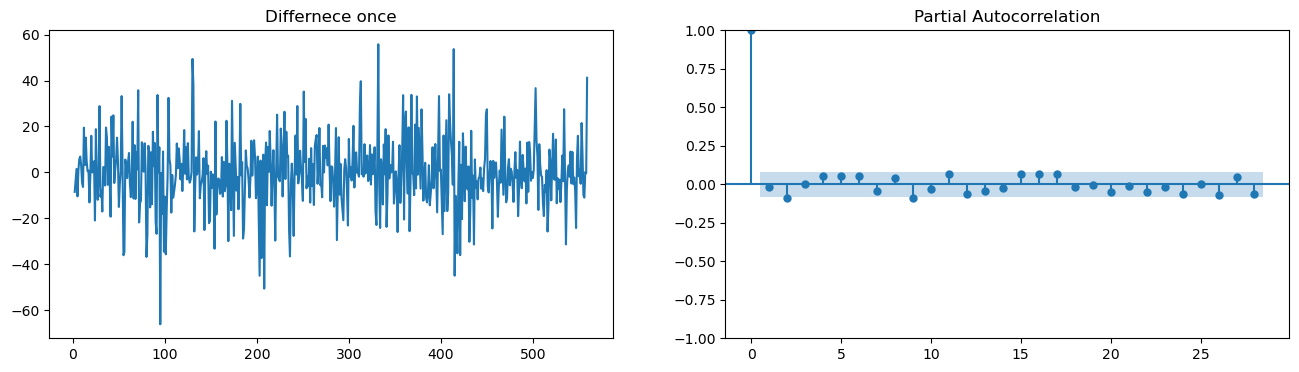

In [415]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = train.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Differnece once")
plot_pacf(diff, ax = ax2);

In [416]:
q = 2

# Arima

In [417]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order = (0, 1 ,0))
result = model.fit()

In [418]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  559
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2301.738
Date:                Tue, 18 Jul 2023   AIC                           4605.477
Time:                        22:41:06   BIC                           4609.801
Sample:                             0   HQIC                          4607.165
                                - 559                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       224.1006      9.943     22.538      0.000     204.612     243.589
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                62.68
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.00
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [419]:
pred = result.predict(start = 1 , end = len(train) )

In [420]:
forcast = result.get_forecast(step = len(test))

TypeError: float() argument must be a string or a number, not 'PredictionResultsWrapper'

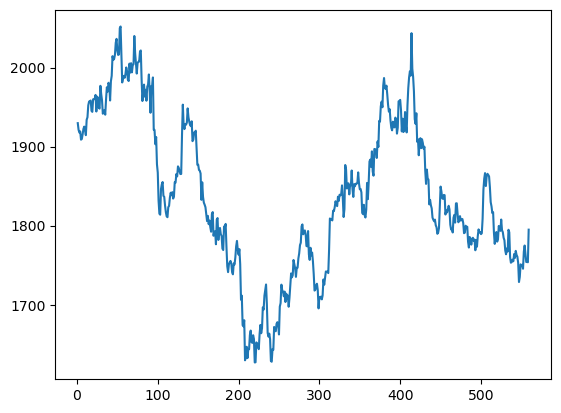

In [421]:
plt.plot(train, label='True (Train)')

plt.plot(forcast, label='forcast')
# Perform your ARIMA predictions and store the results in 'predictions'

# Plot the predicted values
plt.plot(pred, label='Predictions')

# Customize the plot (optional)
plt.title(f"Plot of True and Predicted Values for price")
plt.xlabel("Date")
plt.legend()

# Show the plot
plt.show()

In [ ]:
len(train)

In [ ]:
train

In [ ]:
test

In [ ]:
forcast